<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/ClimateChangeAdapt_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-package

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1647 - loss: 1.8082 - val_accuracy: 0.4235 - val_loss: 1.4847 - learning_rate: 5.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3006 - loss: 1.5531 - val_accuracy: 0.4592 - val_loss: 1.3757 - learning_rate: 5.0000e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3859 - loss: 1.4473 - val_accuracy: 0.4694 - val_loss: 1.3227 - learning_rate: 5.0000e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4338 - loss: 1.3734 - val_accuracy: 0.4745 - val_loss: 1.2864 - learning_rate: 5.0000e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4292 - loss: 1.3379 - val_accuracy: 0.4847 - val_loss: 1.2594 - learning_rate: 5.0000e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4085 - loss: 1.3393 - val_accuracy: 0.4694 - val_loss: 1.2370 - learning_rate: 5.0000e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4294

<ipython-input-4-9c27ef750d55>:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette=colors)


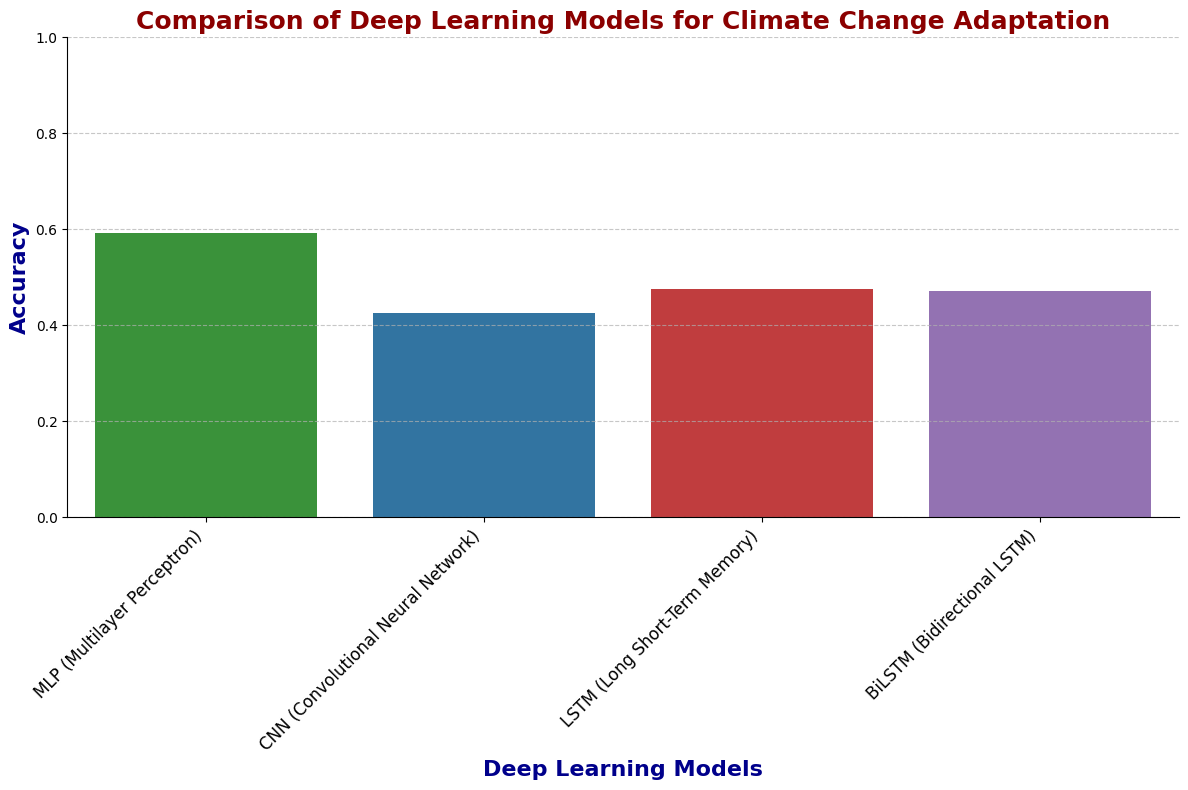

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# Load dataset
df = pd.read_stata('/content/MLDeepLearningModel.dta')

# Rename feature columns
feature_mapping = {
    'edu': 'Years of education',
    'hhsize': 'Size of household',
    'gender': 'Gender of the head of household',
    'age': 'Age of the head of household',
    'inc': 'Farm income',
    'nfinc': 'Nonfarm income',
    'ownlv': 'Livestock ownership',
    'ext': 'Extension on crop and livestock',
    'extcl': 'Information on climate change',
    'ffext': 'Farmer-to-farmer extension',
    'cred': 'Credit',
    'rlgo': 'Number of relatives in got',
    'kolla': 'Local agroecology kola (lowlands)',
    'woinadega': 'Local agroecology weynadega (midlands)',
    'dega': 'Local agroecology dega (highlands)',
    'av_temp': 'Temperature',
    'av_rain': 'Precipitation'
}
df.rename(columns=feature_mapping, inplace=True)

# Rename label columns
label_mapping = {
    'one': 'No adaptation',
    'two': 'Planting trees',
    'three': 'Soil conservation',
    'four': 'Different crop varieties',
    'five': 'Early and late planting',
    'six': 'Irrigation'
}
df.rename(columns=label_mapping, inplace=True)

# Features and labels
features = list(feature_mapping.values())
labels = list(label_mapping.values())
X = df[features].values
y = df[labels].values

# Handle NaNs
X = np.nan_to_num(X, nan=0)
y = np.nan_to_num(y, nan=0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape input for deep learning models
X_train_3d = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_3d = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_3d = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(y_train.shape[1], activation='softmax')
])
mlp_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Define CNN model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_3d.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
cnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Define LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_3d.shape[1], 1)),
    Dropout(0.4),
    LSTM(64),
    Dropout(0.4),
    Dense(y_train.shape[1], activation='softmax')
])
lstm_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Define BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train_3d.shape[1], 1)),
    Dropout(0.4),
    Bidirectional(LSTM(64)),
    Dropout(0.4),
    Dense(y_train.shape[1], activation='softmax')
])
bilstm_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
models = {'MLP (Multilayer Perceptron)': mlp_model, 'CNN (Convolutional Neural Network)': cnn_model,
          'LSTM (Long Short-Term Memory)': lstm_model, 'BiLSTM (Bidirectional LSTM)': bilstm_model}
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)]

for name, model in models.items():
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluate models
model_results = {}
for name, model in models.items():
    model_results[name] = model.evaluate(X_test, y_test, verbose=0)[1]

# Display results
print(tabulate(sorted(model_results.items(), key=lambda x: x[1], reverse=True), headers=['Model', 'Accuracy'], tablefmt='grid'))

# Plot for Accuracy Comparison
plt.figure(figsize=(12, 8))  # Larger figure for better readability
colors = ['#2ca02c', '#1f77b4', '#d62728', '#9467bd']  # Custom colors for aesthetics

# Create a barplot with additional styling for a cleaner look
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette=colors)

# Customize the labels and title with larger fonts and more stylish text
plt.xlabel("Deep Learning Models", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Accuracy", fontsize=16, fontweight='bold', color='darkblue')
plt.title("Comparison of Deep Learning Models for Climate Change Adaptation", fontsize=18, fontweight='bold', color='darkred')

# Adjust the x-ticks for better spacing and readability
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='light', color='black')

# Set y-axis limit for better consistency in visual scaling
plt.ylim(0, 1)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a clean border around the plot
sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

